# Importing the data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Loan.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [215]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking Missing Values

In [216]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [217]:
df.isnull().sum().sum() 

149

In [218]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Dependents'] = df['Dependents'].fillna(0)
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

#For numeric values-mean can be used for replacing missing values with no outliers.

#For categorical features, mode is used.

#For numerical values with outliers, median is used.Therefore, for Loan_Amount_Term, median is used as the data is negatively skewed.

In [219]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualizations

<AxesSubplot:xlabel='Gender', ylabel='count'>

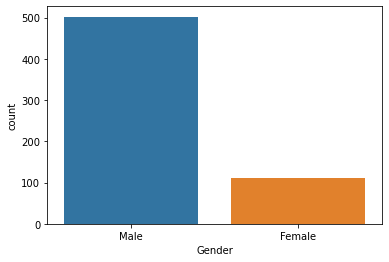

In [220]:
sns.countplot(df.Gender)

Loans by male customers are more compared to female.

<AxesSubplot:xlabel='Married', ylabel='count'>

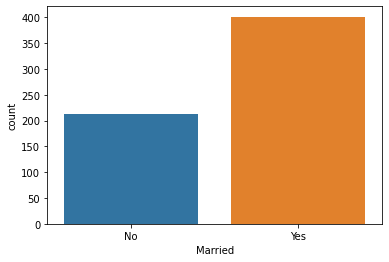

In [221]:
sns.countplot(df.Married)

Loans by married people are more compared to unmarried.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

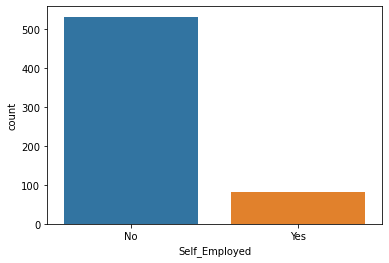

In [222]:
sns.countplot(df.Self_Employed)

Loans are taken mostly by people who are employed in someone's company.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

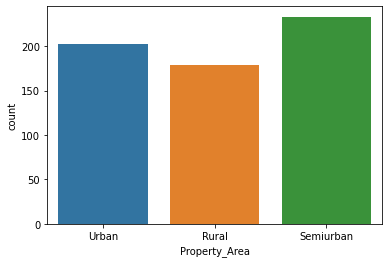

In [223]:
sns.countplot(df.Property_Area)

Property_Area is more of Semiurban.

In [224]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

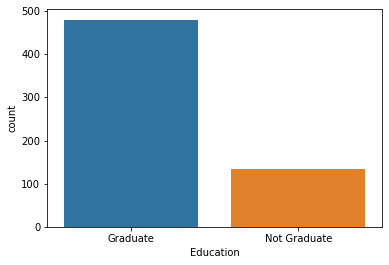

In [225]:
sns.countplot(df.Education)

Mostly graduates have applied for loan

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

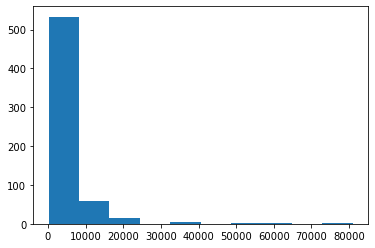

In [226]:
plt.hist(df['ApplicantIncome'])

Mostly,People with income within 10000 have applied for loans

In [227]:
df.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Normal loan amount term is 360 days.

In [228]:
df.Credit_History.value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

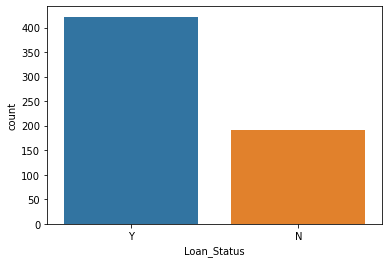

In [229]:
sns.countplot(df.Loan_Status)

Mostly applied loans (more than 400 out of 614) have been considered.

In [230]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Label_Encoding

In [231]:
df= df.drop(['Loan_ID'],axis = 1)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [232]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

In [233]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])

In [234]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [235]:
df.head(
)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Removing Outliers

In [236]:
from scipy.stats import zscore

In [237]:
z=np.abs(zscore(df))
print(z)

       Gender   Married  Dependents  Education  Self_Employed  \
0    0.472343  1.372089    0.737806   0.528362       0.392601   
1    0.472343  0.728816    0.253470   0.528362       0.392601   
2    0.472343  0.728816    0.737806   0.528362       2.547117   
3    0.472343  0.728816    0.737806   1.892641       0.392601   
4    0.472343  1.372089    0.737806   0.528362       0.392601   
..        ...       ...         ...        ...            ...   
609  2.117107  1.372089    0.737806   0.528362       0.392601   
610  0.472343  0.728816    2.236021   0.528362       0.392601   
611  0.472343  0.728816    0.253470   0.528362       0.392601   
612  0.472343  0.728816    1.244745   0.528362       0.392601   
613  2.117107  1.372089    0.737806   0.528362       2.547117   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991           0.554487    0.000000          0.273231   
1           0.134412           0.038732    0.219273          0.273231   


In [238]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(614, 12)


In [239]:
df_new=df[(z<3).all(axis=1)]

In [240]:
print(df.shape)
print(df_new.shape)
df=df_new
print('Shape after removing outliers',df.shape)

(614, 12)
(577, 12)
Shape after removing outliers (577, 12)


# Correlation

<AxesSubplot:>

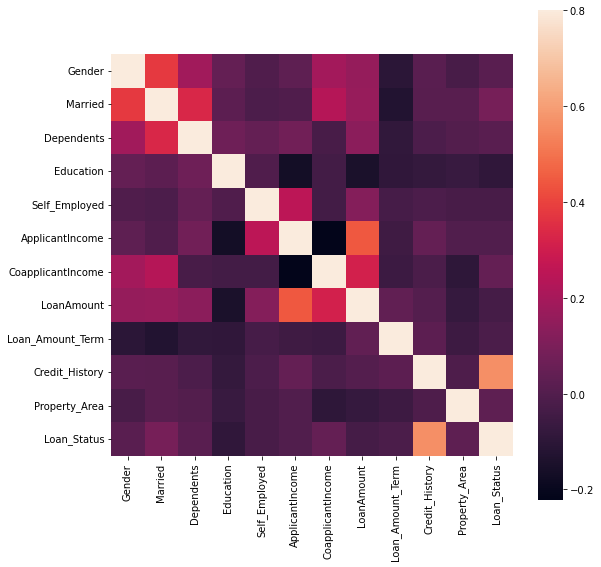

In [241]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

Darker shades of the color indicate smaller values while brighter shades correspond to larger values (near to 1).
Loan_Status is positively correlated with Credit History.

In [242]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Train & Test Data

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [244]:
x=df.iloc[:,:11]
y=df['Loan_Status']

In [245]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [246]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Logistic Regression

In [248]:
model = LogisticRegression()


In [249]:
model.fit(x_train, y_train)

LogisticRegression()

In [250]:
ypred = model.predict(x_test)

In [251]:

evaluation = f1_score(y_test, ypred)
evaluation

0.8636363636363635

# Decision Tree Classsifier

In [252]:
tree=DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [253]:
ypred_tree=tree.predict(x_test)
print(ypred_tree)

[1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 0 1]


In [254]:
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

0.763157894736842

# Random Forest Classifier

In [255]:
forest= RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [256]:
ypred_forest=forest.predict(x_test)
print(ypred_forest)

[1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1]


In [257]:
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.8488372093023255

Logistic Regression performed better than others, Random Forest did better than Decision Tree.



# HyperTuning Parameters

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8241443108233117


# ROC Curve

In [263]:
from sklearn.metrics import roc_auc_score,roc_curve

In [264]:
model= LogisticRegression()
model= model.fit(x_train,y_train)
pred_prob=model.predict_proba(x_test)[:,1]
pred_prob

array([0.7841387 , 0.14835858, 0.87282054, 0.7396525 , 0.89116837,
       0.16735756, 0.75814431, 0.78223239, 0.82059979, 0.78363285,
       0.83472865, 0.92981989, 0.91204515, 0.70505533, 0.2008284 ,
       0.85754687, 0.83934903, 0.27966082, 0.68254609, 0.82819715,
       0.16008013, 0.69086627, 0.83480946, 0.63033907, 0.71929132,
       0.76337087, 0.94764876, 0.65187998, 0.78793436, 0.81941088,
       0.87816189, 0.91172163, 0.78826225, 0.89752491, 0.77718708,
       0.78826403, 0.84955842, 0.09170366, 0.85928966, 0.70856204,
       0.74935069, 0.22171498, 0.77983625, 0.8414624 , 0.84438128,
       0.64694635, 0.81800514, 0.82840446, 0.68864489, 0.76856583,
       0.83402043, 0.13707575, 0.3688727 , 0.78732201, 0.71090068,
       0.11700496, 0.81619259, 0.87625006, 0.7840936 , 0.20638341,
       0.88957131, 0.80799292, 0.76751689, 0.81019222, 0.36354159,
       0.84179669, 0.62680104, 0.87105121, 0.85943242, 0.80769501,
       0.81767326, 0.89101205, 0.83832665, 0.06750127, 0.77264

In [265]:
fpr,tpr,thresholds=roc_curve(y_test,pred_prob,pos_label=True)

In [266]:
print(fpr)
print("/n")
print(tpr)
print("/n")
print(thresholds)

[0.         0.02564103 0.02564103 0.1025641  0.1025641  0.15384615
 0.15384615 0.17948718 0.17948718 0.20512821 0.20512821 0.25641026
 0.25641026 0.28205128 0.28205128 0.30769231 0.30769231 0.41025641
 0.41025641 0.43589744 0.43589744 0.46153846 0.46153846 0.56410256
 0.56410256 0.58974359 0.58974359 1.        ]
/n
[0.         0.         0.02597403 0.02597403 0.07792208 0.07792208
 0.27272727 0.27272727 0.5974026  0.5974026  0.61038961 0.61038961
 0.66233766 0.66233766 0.77922078 0.77922078 0.85714286 0.85714286
 0.8961039  0.8961039  0.94805195 0.94805195 0.96103896 0.96103896
 0.97402597 0.97402597 1.         1.        ]
/n
[1.96178648 0.96178648 0.92981989 0.91172163 0.88957131 0.87816189
 0.84768605 0.84438128 0.80769501 0.79587521 0.78826403 0.78793436
 0.78363285 0.7830096  0.76856583 0.76751689 0.74556429 0.71090068
 0.70505533 0.69202468 0.68254609 0.65388869 0.65350415 0.63979979
 0.63051049 0.63033907 0.3688727  0.06750127]


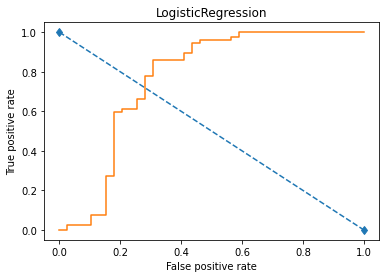

In [267]:
plt.plot([0,1],[1,0],'d--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()

# Saving the model

In [259]:
import pickle 
filename="loan.pkl"
pickle.dump(model,open(filename,'wb'))

In [260]:
loaded_model=pickle.load(open('loan.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7931034482758621
